In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df=pd.read_csv('TeluguMovies_dataset.csv')
df.head(10)

,Unnamed: 0,Movie,Year,Certificate,Genre,Overview,Runtime,Rating,No.of.Ratings
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,8.1,99114
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,8.2,71458
2,2,1 - Nenokkadine,2014.0,UA,"Action, Thriller",A rock star must overcome his psychologica...,170,8.1,42372
3,3,Dhoom:3,2013.0,UA,"Action, Thriller","When Sahir, a circus entertainer trained i...",172,5.4,42112
4,4,Ra.One,2011.0,U,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,156,4.6,37211
5,5,Dhoom:2,2006.0,UA,"Action, Thriller","Mr A, a fearless thief, steals valuable ar...",152,6.5,22983
6,6,Eega,2012.0,UA,"Action, Fantasy",A murdered man is reincarnated as a housef...,145,7.7,20636
7,7,Krrish 3,2013.0,U,"Action, Sci-Fi",Krrish and his scientist father have to sa...,152,5.2,20026
8,8,Arjun Reddy,2017.0,A,"Action, Drama, Romance","Arjun Reddy, a short tempered house surgeo...",182,8.1,19419
9,9,Rangasthalam,2018.0,UA,"Action, Drama",The fear of his elder brother's death star...,170,8.4,17559


In [3]:
df.drop(columns='Unnamed: 0',inplace=True)
df.reset_index(inplace=True)
df

,index,Movie,Year,Certificate,Genre,Overview,Runtime,Rating,No.of.Ratings
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,8.1,99114
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,8.2,71458
2,2,1 - Nenokkadine,2014.0,UA,"Action, Thriller",A rock star must overcome his psychologica...,170,8.1,42372
3,3,Dhoom:3,2013.0,UA,"Action, Thriller","When Sahir, a circus entertainer trained i...",172,5.4,42112
4,4,Ra.One,2011.0,U,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,156,4.6,37211
...,...,...,...,...,...,...,...,...,...
1395,1395,Maro Monagadu,1985.0,NaN,NaN,NaN,0,8.6,49
1396,1396,Jakkanna,2016.0,NaN,"Comedy, Drama",The movie is about an attempt by Sunil the...,0,6.3,49
1397,1397,Muvva Gopaludu,1987.0,NaN,"Drama, Romance",Muvva Gopaludu is a 1987 Indian Telugu fil...,137,7.8,49
1398,1398,Ninney Ishta Paddaanu,2003.0,U,NaN,Hero Charan (Tarun) a middle class family ...,0,5.9,49


Text(0, 0.5, 'MovieRatings')

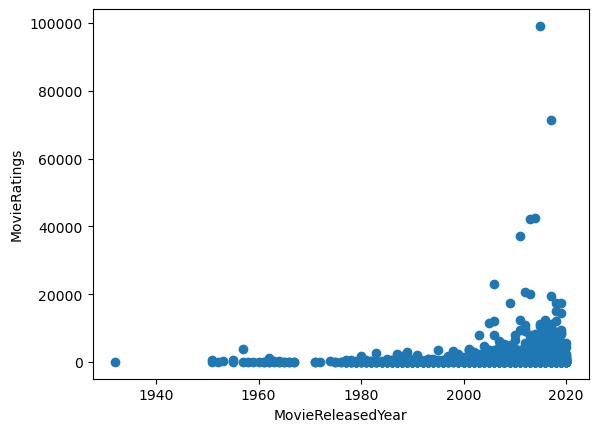

In [4]:
plt.scatter(x='Year',y='No.of.Ratings',data=df)
plt.xlabel('MovieReleasedYear')
plt.ylabel('MovieRatings')

Text(0, 0.5, 'Number of Ratings')

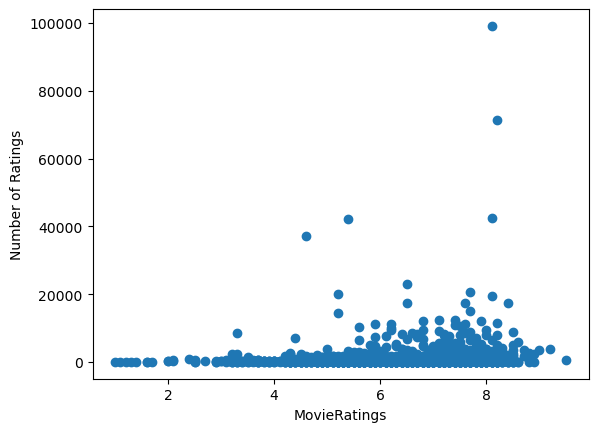

In [5]:
plt.scatter(x='Rating',y='No.of.Ratings',data=df)
plt.xlabel("MovieRatings")
plt.ylabel("Number of Ratings")

In [6]:
#Constraints i consider for recommending movies are year>1950 and rating>3 and numberofRatings>500
minimumYear = 1980
minimumRating = 3
minimumRatings = 400
df=df.loc[(df['Year']>minimumYear) & (df['Rating']>minimumRating) &(df['No.of.Ratings']>minimumRatings)]
df

,index,Movie,Year,Certificate,Genre,Overview,Runtime,Rating,No.of.Ratings
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,8.1,99114
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,8.2,71458
2,2,1 - Nenokkadine,2014.0,UA,"Action, Thriller",A rock star must overcome his psychologica...,170,8.1,42372
3,3,Dhoom:3,2013.0,UA,"Action, Thriller","When Sahir, a circus entertainer trained i...",172,5.4,42112
4,4,Ra.One,2011.0,U,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,156,4.6,37211
...,...,...,...,...,...,...,...,...,...
542,542,Pandaga Chesko,2015.0,UA,"Action, Drama, Family","Karthik, a money minded businessman, gets ...",162,5.4,413
543,543,Lakshmi,2006.0,U,"Action, Drama",Lakshmi (Venkatesh) a business tycoon hide...,0,5.8,410
545,545,Seetha,2019.0,UA,Romance,A four-year-old Ram is left in a monastery...,161,4.7,405
548,548,Samarasimha Reddy,1999.0,UA,"Action, Drama",Revenge story between Samarasimha Reddy an...,148,7.1,402


In [7]:
features=['Movie','Genre','Overview']
movieData = df[features].fillna('').apply(lambda x: ' '.join(x), axis=1)
movieData

0      Bahubali: The Beginning Action, Drama         ...
1      Baahubali 2: The Conclusion Action, Drama     ...
2      1 - Nenokkadine Action, Thriller              ...
3      Dhoom:3 Action, Thriller                 When ...
4      Ra.One Action, Adventure, Sci-Fi              ...
                             ...                        
542    Pandaga Chesko Action, Drama, Family          ...
543    Lakshmi Action, Drama                 Lakshmi ...
545    Seetha Romance                 A four-year-old...
548    Samarasimha Reddy Action, Drama               ...
549    Andhrawala Action, Drama                 A you...
Length: 512, dtype: object

In [8]:
wnl=WordNetLemmatizer()
corpus=[]
for item in movieData:
    words=re.sub('[^a-zA-Z]',' ',item)
    words=sent_tokenize(words)
    words=[wnl.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]  
    words=' '.join(words)
    corpus.append(words)
corpus[1]

'Baahubali    The Conclusion Action  Drama                 When Shiva  the son of Bahubali  learns about his heritage  he begins to look for answers  His story is juxtaposed with past events that unfolded in the Mahishmati Kingdom'

In [9]:
tfidf = TfidfVectorizer()
tfidfData=tfidf.fit_transform(corpus)
tfidfData

<512x3665 sparse matrix of type '<class 'numpy.float64'>'
	with 13077 stored elements in Compressed Sparse Row format>

In [10]:
knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=10)
knn.fit(tfidfData)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [11]:
def recommend_movie(movieName):
    movieName=movieName.lower()
    validMovieIndex = df.loc[df['Movie'].str.lower().str.contains(movieName)].index.values[0]
    print("The selected movie is:",df.loc[df['Movie'].str.lower().str.contains(movieName)].Movie.values[0])
    distances,indexs= (knn.kneighbors(tfidfData[validMovieIndex],n_neighbors=20))
    distance_list = distances.squeeze().tolist()
    indices_list=indexs.squeeze().tolist()
    combined_list = list(zip(indices_list,distance_list))
    sorted_list = sorted(combined_list,key=lambda x:x[1])

    recommend_list=[]
    index=0
    for val in sorted_list:
        title=df.iloc[val[0]].Movie
        genre=df.iloc[val[0]].Genre
        recommend_list.append({'MovieName':title,'Genre':genre,'Distance':val[1]}) #appending a dictonary

    recommend_list=pd.DataFrame(recommend_list) #dataframe accepts dictonary
    return recommend_list

In [12]:
recommend_movie('Saaho')

The selected movie is: Saaho


,MovieName,Genre,Distance
0,Saaho,"Action, Thriller",0.000000
1,Bahubali: The Beginning,"Action, Drama",0.853620
2,Dookudu,"Action, Comedy",0.861864
3,Ezra,"Horror, Mystery, Thriller",0.864607
4,Aithe,"Action, Adventure, Thriller",0.868755
5,Iddarammayilatho,"Action, Thriller",0.876455
6,Golimar,Action,0.885281
7,Sarrainodu,"Action, Drama",0.886042
8,Singam 2,"Action, Thriller",0.886159
9,Aadhi Bhagavan,Action,0.888890


In [13]:
recommend_movie('bahubali')

The selected movie is: Bahubali: The Beginning


,MovieName,Genre,Distance
0,Bahubali: The Beginning,"Action, Drama",0.000000
1,Bobby,"Drama, Romance",0.828771
2,Sree,Action,0.842372
3,Mahanati,"Biography, Drama",0.852047
4,Saaho,"Action, Thriller",0.853620
5,Andhrawala,"Action, Drama",0.870740
6,Bhadra,Action,0.891395
7,Indra,"Action, Drama",0.893157
8,Rowdy,"Action, Crime, Drama",0.894648
9,Kadhal Desam,"Comedy, Drama, Romance",0.896638


In [14]:
recommend_movie('dhoom')

The selected movie is: Dhoom:3


,MovieName,Genre,Distance
0,Dhoom:3,"Action, Thriller",3.330669e-16
1,Dhoom:2,"Action, Thriller",8.321303e-01
2,Jai Simha,"Action, Drama",8.545984e-01
3,Yaman,"Action, Drama, Thriller",8.706984e-01
4,Dohchay,Action,8.802716e-01
5,Kuruthipunal,"Action, Drama, Thriller",8.820089e-01
6,Simha,"Action, Drama",8.898074e-01
7,Golimar,Action,8.932603e-01
8,Thaanaa Serndha Koottam,"Action, Comedy, Crime",8.970238e-01
9,Dhada,"Action, Comedy",9.028645e-01


In [15]:
recommend_movie('Leader')

The selected movie is: Leader


,MovieName,Genre,Distance
0,Rakhta Charitra,"Action, Biography, Crime",0.000000
1,Rakhta Charitra 2,"Action, Biography, Crime",0.707803
2,Yaman,"Action, Drama, Thriller",0.847196
3,Mirchi,"Action, Drama",0.863866
4,Krishnam Vande Jagadgurum,Action,0.868013
5,Anirudh,"Action, Drama, Family",0.875469
6,Drushyam,"Crime, Drama, Family",0.885905
7,Rakshasudu,"Action, Crime, Thriller",0.886245
8,Shiva,"Action, Crime, Drama",0.888318
9,Nijam,Action,0.889195


In [16]:
knn=NearestNeighbors(metric='manhattan',algorithm='brute',n_neighbors=10)
knn.fit(tfidfData)

NearestNeighbors(algorithm='brute', metric='manhattan', n_neighbors=10)

In [17]:
def recommend_movie(movieName):
    movieName=movieName.lower()
    validMovieIndex = df.loc[df['Movie'].str.lower().str.contains(movieName)].index.values[0]
    print("The selected movie is:",df.loc[df['Movie'].str.lower().str.contains(movieName)].Movie.values[0])
    distances,indexs= (knn.kneighbors(tfidfData[validMovieIndex],n_neighbors=20))
    distance_list = distances.squeeze().tolist()
    indices_list=indexs.squeeze().tolist()
    combined_list = list(zip(indices_list,distance_list))
    sorted_list = sorted(combined_list,key=lambda x:x[1])

    recommend_list=[]
    index=0
    for val in sorted_list:
        title=df.iloc[val[0]].Movie
        genre=df.iloc[val[0]].Genre
        recommend_list.append({'MovieName':title,'Genre':genre,'Distance':val[1]}) #appending a dictonary

    recommend_list=pd.DataFrame(recommend_list) #dataframe accepts dictonary
    return recommend_list

In [18]:
recommend_movie('bahubali')

The selected movie is: Bahubali: The Beginning


,MovieName,Genre,Distance
0,Bahubali: The Beginning,"Action, Drama",0.000000
1,Raju Bhai,Drama,5.794717
2,Yamajaathakudu,"Action, Comedy, Fantasy",5.969095
3,Coolie No. 1,"Action, Drama, Romance",5.992676
4,Raju Maharaju,Family,6.025596
5,Samarasimha Reddy,"Action, Drama",6.059643
6,Vedam,"Action, Drama",6.325315
7,Mahanati,"Biography, Drama",6.482885
8,Bobby,"Drama, Romance",6.485556
9,Tappu Chesi Pappu Koodu,Comedy,6.492560


In [19]:
knn=NearestNeighbors(metric='euclidean',algorithm='brute',n_neighbors=10)
knn.fit(tfidfData)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=10)

In [20]:
def recommend_movie(movieName):
    movieName=movieName.lower()
    validMovieIndex = df.loc[df['Movie'].str.lower().str.contains(movieName)].index.values[0]
    print("The selected movie is:",df.loc[df['Movie'].str.lower().str.contains(movieName)].Movie.values[0])
    distances,indexs= (knn.kneighbors(tfidfData[validMovieIndex],n_neighbors=20))
    distance_list = distances.squeeze().tolist()
    indices_list=indexs.squeeze().tolist()
    combined_list = list(zip(indices_list,distance_list))
    sorted_list = sorted(combined_list,key=lambda x:x[1])

    recommend_list=[]
    index=0
    for val in sorted_list:
        title=df.iloc[val[0]].Movie
        genre=df.iloc[val[0]].Genre
        recommend_list.append({'MovieName':title,'Genre':genre,'Distance':val[1]}) #appending a dictonary

    recommend_list=pd.DataFrame(recommend_list) #dataframe accepts dictonary
    return recommend_list

In [21]:
recommend_movie('bahubali')

The selected movie is: Bahubali: The Beginning


,MovieName,Genre,Distance
0,Bahubali: The Beginning,"Action, Drama",0.000000
1,Bobby,"Drama, Romance",1.287455
2,Sree,Action,1.297977
3,Mahanati,"Biography, Drama",1.305410
4,Saaho,"Action, Thriller",1.306614
5,Andhrawala,"Action, Drama",1.319652
6,Bhadra,Action,1.335212
7,Indra,"Action, Drama",1.336531
8,Rowdy,"Action, Crime, Drama",1.337645
9,Kadhal Desam,"Comedy, Drama, Romance",1.339133
